In [13]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import pyrtools as ppt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


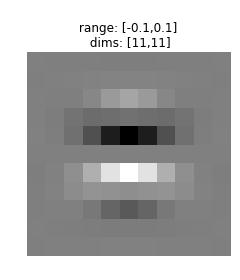

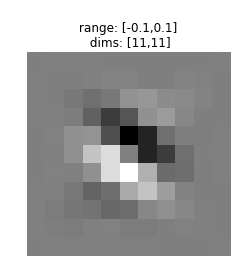

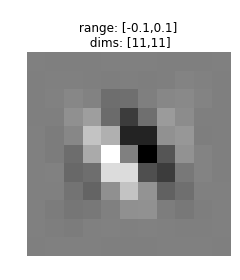

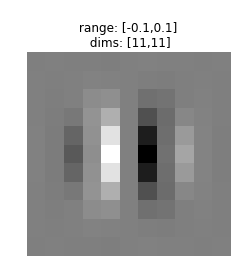

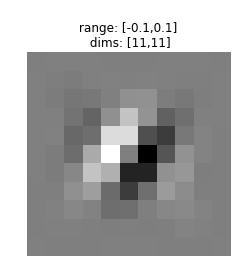

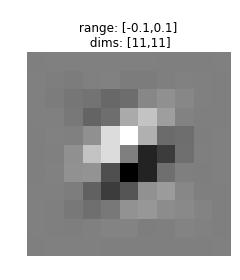

In [17]:
# Choose a filter set (options are 'sp0Filters', 'sp1Filters', 'sp3Filters', 'sp5Filters'):
filters = ppt.steerable_filters('sp5Filters')
fsz = int(np.round(np.sqrt(filters['bfilts'].shape[0])))
fsz = np.array([fsz, fsz])
nfilts = filters['bfilts'].shape[1]
nrows = int(np.floor(np.sqrt(nfilts)))

import scipy.signal as sps
# Look at the oriented bandpass filters:
filtList = []
for f in range(nfilts):
    filtList.append(sps.convolve2d(filters['bfilts'][:,f].reshape(fsz), filters['lo0filt']))
    ppt.showIm(sps.convolve2d(filters['bfilts'][:,f].reshape(fsz), filters['lo0filt']))
# jbh.showIm(filtList, 'auto', 4, '', 256, 4)

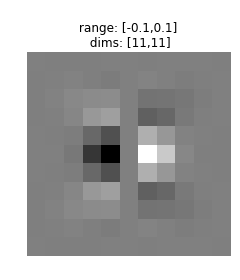

In [18]:
# Try "steering" to a new orientation (new_ori in degrees):
new_ori = 180
# new_ori = 360*np.random.rand(1)[0]
ppt.showIm( sps.convolve2d( ppt.steer(filters['bfilts'],
                                      new_ori * np.pi/180).reshape(fsz),
                           filters['lo0filt']))#, 'auto', 4)

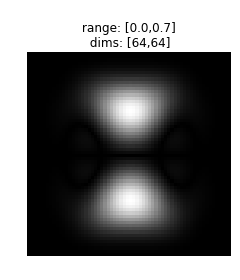

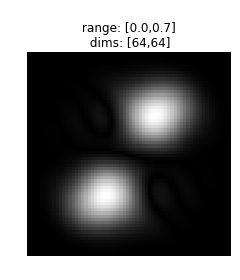

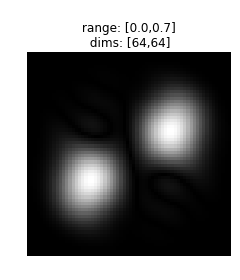

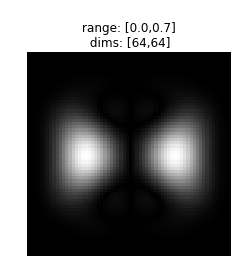

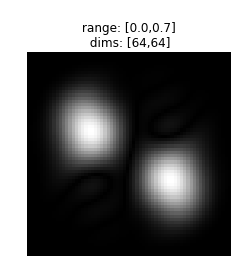

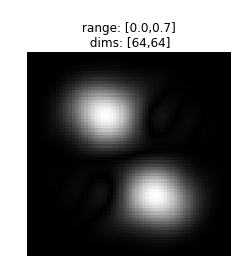

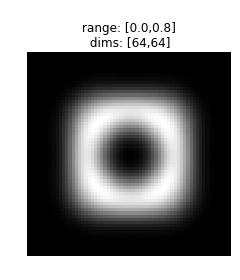

In [20]:
# Look at Fourier transform magnitudes:
lo0filt = filters['lo0filt']
bfilts = filters['bfilts']
lo0 = np.fft.fftshift(np.abs(np.fft.fft2(filters['lo0filt'],(64,64))))
fsum = np.zeros(lo0.shape)
imgList = []
for f in range(bfilts.shape[1]):
    flt = bfilts[:,f].reshape(fsz)
    freq = lo0 * np.fft.fftshift(np.abs(np.fft.fft2(flt,(64,64))))
    fsum += freq**2
    imgList.append(freq)
    ppt.showIm(freq)
# jbh.showIm(imgList, 'auto', 3, '', 256, 4)

# The filters sum to a smooth annular ring:
ppt.showIm(fsum)#, 'auto', 3)